# BioE 101 Lab 4 - Build an EKG - Week 1

## Objectives:

- Learn about cardiac signals and EKG measurement

- Apply theory of interference, CMRR, noise, and instrumentation amplifiers

- Build filters for signal conditioning

- Gain practical experience with soldering and protoboards

- Interface conditioned analog signals with digital logic in Arduino and Python

**<span style="color:red">NOTE: This lab involves the use of electrodes directly coupled to skin. Please STOP
and CALL a TA over if you are uncomfortable with using these electrodes, or if you feel
tingling/dizziness from wearing them. ALWAYS ASK if you are uncertain of a circuit
connection before hooking up the electrodes to yourself.</span>**

## Schedule and Lab Reports
-  Week 1: Prototype an EKG amplifier on a breadboard and test it on a live human
subject.

- Week 2: Read out your EKG data to the Arduino and get fancy for extra credit. The entire lab report is due the
week following the lab — no lab report is due at the beginning of the second week.

## 5. Arduino/Python Heart Monitor
- Retrieve your breakboard EKG circuit from last week, and hook up an Arduino Uno to a lab or personal computer via USB
- Upload the send_serial.ino code onto the Arduino using the IDE, as in previous labs, and note the COM port
- Following the same setup as last week, connect two 9V batteries to your circuit and three leads to an (alive) lab partner. The optimal setup is two signal electrodes above and below the chest, and one reference electrode on the right ankle.
- Verify that your EKG is working by hooking up the output to an oscilloscope and observing the waveform
- Now we will use the Arduino to digitize the EKG signal. Disconnect the leads from your lab partner, disconnect the oscilloscope probes, and connect the output of your amplifier to Arduino pin A0, and the ground of your circuit to the 3.3V pin of the Arduino board.
**Before reconnecting the EKG leads, be sure that the your circuit GROUND is only connected to the 3.3V Arduino pin, and that any ground connection to an oscilloscope or power supply is disconnected (otherwise you risk damaging the Arduino).**
- Reconnect the EKG leads to the electrodes and run the following code to acquire the EKG signal. Be sure to insert the correct COM port.


In [16]:
# allows plots to be plotted right below the cell when run
%matplotlib inline 
import serial # the library for reading from serial com ports
import numpy as np # naming convention for numpy library
import matplotlib.pyplot as plt # naming convention for matplotlib
from scipy.fftpack import fft, ifft # import discrete fourier transform and its inverse
from scipy import signal

In [17]:
def sample_arduino():
    # preamble to set up serial communications
    device = "/dev/tty.usbmodem144320" # com port of Arduino <- CHANGE THIS TO THE ONE YOU FOUND
    baud = 115200
    ser = serial.Serial(device, baud, timeout=10)

    # read in every line of serial code and throw away corrupt data
    def read_serial_data(N):
        raw_data = []
        while (len(raw_data) < N+10): 
            data = ser.readline()
            raw_data.append(data)
        data = []
        for i in raw_data:
            try:
                data.append(float(i))
            except:
                continue
        return data
    raw_data = read_serial_data(3000) # <- Adjust this line to read in more/less data
    ser.close()
    return raw_data

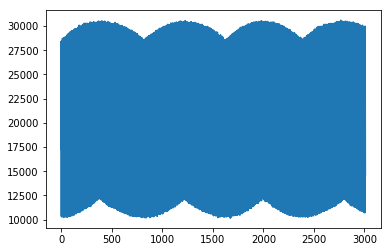

In [18]:
signal = sample_arduino()
plt.plot(signal) # change the indices to zoom in/out in time

**Question 9**: Why are we connecting the circuit ground to the 3.3V pin of the Arduino, as opposed to the GND pin? Hint: disconnect the EKG leads from your lab partner, connect circuit ground to the GND pin, and reconnect the leads. How does your EKG signal change?

Now, run the code below in order to plot and analyze your EKG spectrum in fourier space:

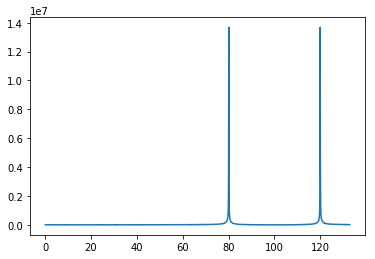

In [19]:
dft = fft(signal) # calculate fourier transform
fs = 200 # SAMPLING RATE, needs to match send_serial.ino code
N = len(dft) # length of discrete fourier transform
freqs = [i*fs/N for i in range(N)] # convert from dft frequencies to Hz
plt.plot(freqs[2:2000], np.abs(dft[2:2000])) # change the indices to zoom in/out in frequency

**Question 10**: Save a plot of your EKG signal and its discrete fourier transform. Based on the bandwidth of your signal, what minimum sampling rate should you be using? Decrease the sampling rate within the send_serial.ino and dft code. At what point do you begin to see aliasing, and does this match your prediction?

Now you're able to sample a chunk of data from the Arduino's analog inputs at a time and process it. This is cool, but we can do better! Similar to the Audio Spectrum Analyzer, let's view the spectrum of the Arduino's analog input in real time. Run the cell below to run a script that will generate a spectrum analyzer for the Arduino. Leave it running as you do Question 5 and 6. 

#### Before running the cell, open up the python file in a text editor of your choice and change the "device = " line to include the correct COM or /dev/ port of your Arduino.

In [1]:
%matplotlib tk
%run serial_spectrumQT.py

ERROR:root:File `'serial_spectrumQT.py'` not found.


## 6. Extra Credit 

Choose any combination of the 3 extra credit options below. Maximum total extra credit is 20pt. 

- **Extra credit: Hardware component** 

-- Solder your entire EKG circuit onto a protoboard for more robust performance and decreased interference. Ask GSI's for soldering guidance and equipment (wires, headers, battery connectors, etc). Test your soldered circuit using an oscilloscope following directions from week 1. Once your circuit is approved by a GSI, record and save your EKG signal using the Arduino. What qualitative differences do you see in signal quality (noise, interference, motion artifacts) between your soldered circuit and the breadboard circuit? (+10 points) 

- ** Extra credit: Software component** 

Build a heart monitor application in python that has the following capabilitie(s):

   -- Design and implement a software band-pass filter to reduce interference and motion artifacts in the EKG signal. Compare your EKG signal before and after filtering. Were you able to reduce interference and/or motion artifacts? Did the filtering affect the shape of your waveform? (+10 points)

   -- Design and implement an algorithm to detect heart rate. Hint: some potential strategies include thresholding or autocorrelation. Measure and record the heart rate of a lab partner before and after doing 10-20 jumping jacks! (+10 points)


**To claim your extra credit, include all code and output graphs in your final lab report. Also take a photo of your soldered heart monitor and include it in your final lab report. **